 # 01: Exploratory Data Analysis & Data Cleaning

 **Objective:** To thoroughly inspect, clean, and understand the water quality dataset.

 **Workflow:**
 1.  **Setup & Load Data**: Import libraries and load the dataset.
 2.  **Initial Inspection**: Get a high-level overview (shape, info, data types).
 3.  **Data Cleaning**:
     - Handle missing values.
     - Check for and remove duplicate records.
 4.  **Descriptive Statistics**:
     - Summarize numerical and categorical features.
     - Check for identifiers.
 5.  **Target Variable Analysis**: Analyze the distribution of the `Water Quality Classification`.
 6.  **Correlation Analysis**:
     - Analyze correlation with the `Water Quality Index (WQI)`.
     - Visualize the correlation matrix.
 7.  **Distribution & Outlier Analysis**:
     - Visualize numerical feature distributions.
     - Quantify skewness and identify potential outliers using the IQR method.
 8.  **Summary of Findings**: Conclude with key takeaways for the next project phase.
 ---

In [1]:
# ==============================================================================
# 1. SETUP & LOAD DATA
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from pathlib import Path

# Configure settings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Dynamic Pathing ---
# Ensures the script can be run from different locations
try:
    current_dir = Path.cwd()
    # Assuming the structure is project_root/notebooks/
    base_dir = current_dir.parent if current_dir.name == 'notebooks' else current_dir
    data_path = base_dir / 'data' / 'raw' / 'water_quality.csv'
    reports_dir = base_dir / 'reports' / 'figures'
except NameError: # Fallback for non-interactive environments
    base_dir = Path('.')
    data_path = base_dir / 'data' / 'raw' / 'water_quality.csv'
    reports_dir = base_dir / 'reports' / 'figures'


# Create directories for saving reports and figures if they don't exist
reports_dir.mkdir(parents=True, exist_ok=True)

# --- Load Dataset ---
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully.")
    print(f"Shape of Dataset: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: Dataset not found at '{data_path}'")
    df = pd.DataFrame() # Create an empty dataframe to prevent further errors


✅ Dataset loaded successfully.
Shape of Dataset: (19029, 24)


 ## 2. Initial Inspection
 A first look at the dataset's structure, data types, and basic statistics.


In [2]:
# ==============================================================================
# 2. INITIAL INSPECTION
# ==============================================================================
if not df.empty:
    print("\n🧾 Dataset Info:")
    df.info()

    print("\n📋 First 5 Rows:")
    display(df.head())

    # Identify feature types
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    print(f"\n🔢 Numerical Columns: {numerical_cols}")
    print(f"🔠 Categorical Columns: {categorical_cols}")


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       15244 non-null  object 
 1   State                         19029 non-null  object 
 2   District                      19029 non-null  object 
 3   Block                         17910 non-null  object 
 4   Village                       19028 non-null  object 
 5   Latitude                      18640 non-null  float64
 6   Longitude                     18639 non-null  float64
 7   Year                          19029 non-null  int64  
 8   pH                            19029 non-null  float64
 9   EC                            19029 non-null  float64
 10  CO3                           19029 non-null  float64
 11  HCO3                          19029 non-null  float64
 12  Cl                            19029 non-nul

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good



🔢 Numerical Columns: ['Latitude', 'Longitude', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS', 'WQI']
🔠 Categorical Columns: ['Well_ID', 'State', 'District', 'Block', 'Village', 'Water Quality Classification']


 ## 3. Data Cleaning
 This section addresses data quality issues such as missing values and duplicates, which are critical to fix before modeling.


In [3]:
# ==============================================================================
# 3. DATA CLEANING
# ==============================================================================
if not df.empty:
    # --- 3.1 Missing Value Analysis ---
    print("\n❓ Checking for Missing Values...")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'count': missing_values, 'percent': missing_percent})
    missing_df = missing_df[missing_df['count'] > 0].sort_values(by='percent', ascending=False)

    if not missing_df.empty:
        print("Columns with missing values:")
        display(missing_df)
        # Impute numerical columns with the median due to potential skewness.
        # Categorical columns with missing values (e.g., Block) will be dropped later if not used.
        print("\nACTION: Imputing missing values in numerical columns with their median...")
        for col in missing_df.index:
            if df[col].dtype in ['float64', 'int64']:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"  - Column '{col}' imputed with median value: {median_val:.2f}")
        print("\n✅ Missing values handled.")
    else:
        print("✅ No missing values found.")

    # --- 3.2 Duplicate Record Check ---
    print("\n🔄 Checking for Duplicate Records...")
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        print(f"Found {duplicate_count} duplicate rows.")
        print("ACTION: Removing duplicate rows...")
        df.drop_duplicates(inplace=True)
        print(f"✅ Duplicates removed. New shape: {df.shape}")
    else:
        print("✅ No duplicate records found.")

    # --- 3.3 Clean Impossible Data Points ---
    print("\n🧹 Cleaning impossible or erroneous data points...")
    initial_rows = len(df)

    # Remove rows with invalid geographic coordinates
    df = df[(df['Latitude'] >= -90) & (df['Latitude'] <= 90) & (df['Longitude'] >= -180) & (df['Longitude'] <= 180)]
    rows_removed = initial_rows - len(df)
    if rows_removed > 0:
        print(f"  - Removed {rows_removed} rows with invalid lat/lon coordinates.")
    
    # Remove rows with negative concentrations for any chemical feature
    initial_rows = len(df)
    chem_cols = ['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS']
    for col in chem_cols:
        # Keep only rows where the value is non-negative
        df = df[df[col] >= 0]
    
    rows_removed = initial_rows - len(df)
    if rows_removed > 0:
        print(f"  - Removed {rows_removed} rows with negative chemical concentrations.")

    print(f"\n✅ Data cleaning complete. Final shape after cleaning: {df.shape}")


❓ Checking for Missing Values...
Columns with missing values:


,count,percent
Well_ID,3785,19.890693
Block,1119,5.880498
Longitude,390,2.049503
Latitude,389,2.044248
Village,1,0.005255



ACTION: Imputing missing values in numerical columns with their median...
  - Column 'Longitude' imputed with median value: 76.17
  - Column 'Latitude' imputed with median value: 24.18

✅ Missing values handled.

🔄 Checking for Duplicate Records...
Found 7 duplicate rows.
ACTION: Removing duplicate rows...
✅ Duplicates removed. New shape: (19022, 24)

🧹 Cleaning impossible or erroneous data points...
  - Removed 161 rows with invalid lat/lon coordinates.
  - Removed 1 rows with negative chemical concentrations.

✅ Data cleaning complete. Final shape after cleaning: (18860, 24)


 ## 4. Descriptive Statistics
 Summarizing the data to understand its central tendency, dispersion, and to check for any identifier columns.


In [4]:
# ==============================================================================
# 4. DESCRIPTIVE STATISTICS
# ==============================================================================
if not df.empty:
    print("\n📈 Summary Statistics for Numerical Features:")
    display(df.describe().T)

    print("\n📊 Summary Statistics for Categorical Features:")
    display(df.describe(include='object').T)

    print("\n🆔 Checking for Identifier Columns...")
    is_identifier_found = False
    for col in df.columns:
        if df[col].nunique() == len(df):
            print(f"  - '{col}' is a potential identifier (all values are unique).")
            is_identifier_found = True
    if not is_identifier_found:
        print("  - No obvious identifier columns found.")


📈 Summary Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Latitude,18860.0,38.152043,27.492976,0.000000,20.191693,24.178415,75.318575,89.966667
Longitude,18860.0,60.855951,28.060891,0.000000,25.420122,76.175000,79.482475,95.909805
Year,18860.0,2020.272004,1.310945,2019.000000,2019.000000,2020.000000,2022.000000,2022.000000
pH,18860.0,7.713367,0.490346,2.800000,7.450000,7.720000,8.000000,10.920000
EC,18860.0,1198.420730,1350.800550,2.290000,532.000000,865.000000,1396.000000,26520.000000
CO3,18860.0,3.325958,15.554438,0.000000,0.000000,0.000000,0.000000,368.000000
HCO3,18860.0,297.929795,180.886423,0.000000,177.040000,281.000000,390.400000,3112.000000
Cl,18860.0,172.920271,351.121503,0.000000,32.000000,78.000000,177.000000,9217.000000
SO4,18860.0,68.523611,149.415129,0.000000,13.000000,31.000000,70.000000,7601.000000
NO3,18860.0,35.348955,55.668569,0.000000,4.600000,18.000000,43.000000,1534.900000



📊 Summary Statistics for Categorical Features:


,count,unique,top,freq
Well_ID,15085,9654,W225500077390401,11
State,18860,14,Madhya Pradesh,3628
District,18860,600,EAST GODAVARI,155
Block,17772,5020,Phanda,54
Village,18859,11161,Block Office,943
Water Quality Classification,18860,5,Unsuitable for Drinking,6602



🆔 Checking for Identifier Columns...
  - No obvious identifier columns found.


 ## 5. Target Variable Analysis
 Understanding the class distribution is crucial for modeling, as imbalance can bias the model.


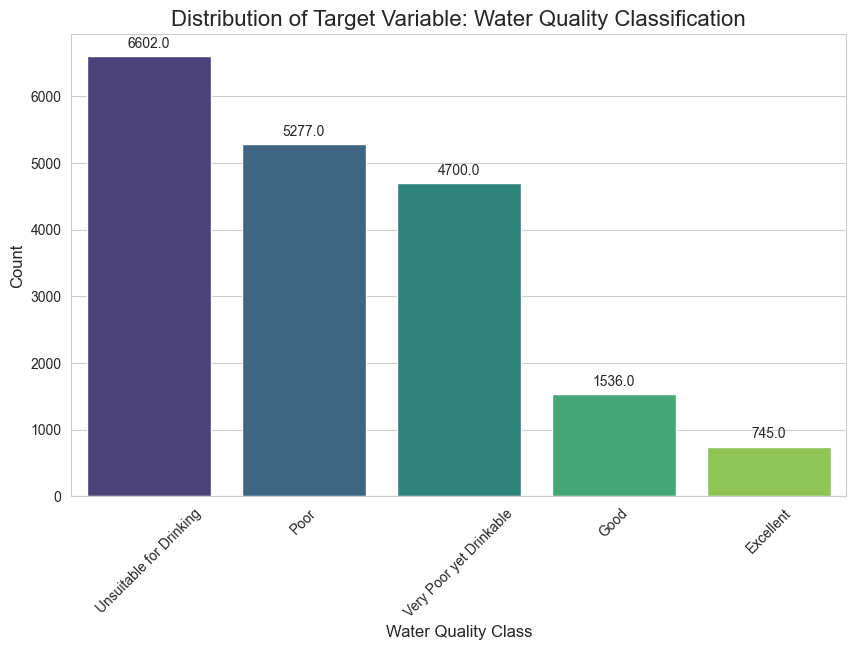


🎯 Class Balance:
Water Quality Classification
Unsuitable for Drinking    35.005302
Poor                       27.979852
Very Poor yet Drinkable    24.920467
Good                        8.144221
Excellent                   3.950159
Name: proportion, dtype: float64


In [5]:
# ==============================================================================
# 5. TARGET VARIABLE ANALYSIS
# ==============================================================================
TARGET_COL = 'Water Quality Classification'

if TARGET_COL in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        x=TARGET_COL,
        data=df,
        palette='viridis',
        order=df[TARGET_COL].value_counts().index
    )
    plt.title('Distribution of Target Variable: Water Quality Classification', fontsize=16)
    plt.xlabel('Water Quality Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    plt.savefig(reports_dir / 'target_variable_distribution.png', bbox_inches='tight')
    plt.show()

    print("\n🎯 Class Balance:")
    print(df[TARGET_COL].value_counts(normalize=True) * 100)
else:
    print(f"⚠️ Target column '{TARGET_COL}' not found.")

 ## 6. Correlation Analysis
 We analyze the correlation of numerical features with the `Water Quality Index (WQI)` to identify the most influential features for our model.




🔗 Correlation of Numerical Features with WQI:
WQI          1.000000
EC           0.981491
Cl           0.932478
TDS          0.924267
Na           0.903996
TH           0.821656
Mg           0.776206
SO4          0.705616
Ca           0.623979
HCO3         0.491986
NO3          0.378296
K            0.274326
CO3          0.096560
F            0.091649
pH           0.012540
Year        -0.016749
Longitude   -0.017538
Latitude    -0.039423
Name: WQI, dtype: float64

✅ Correlation heatmap saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\correlation_heatmap.png'


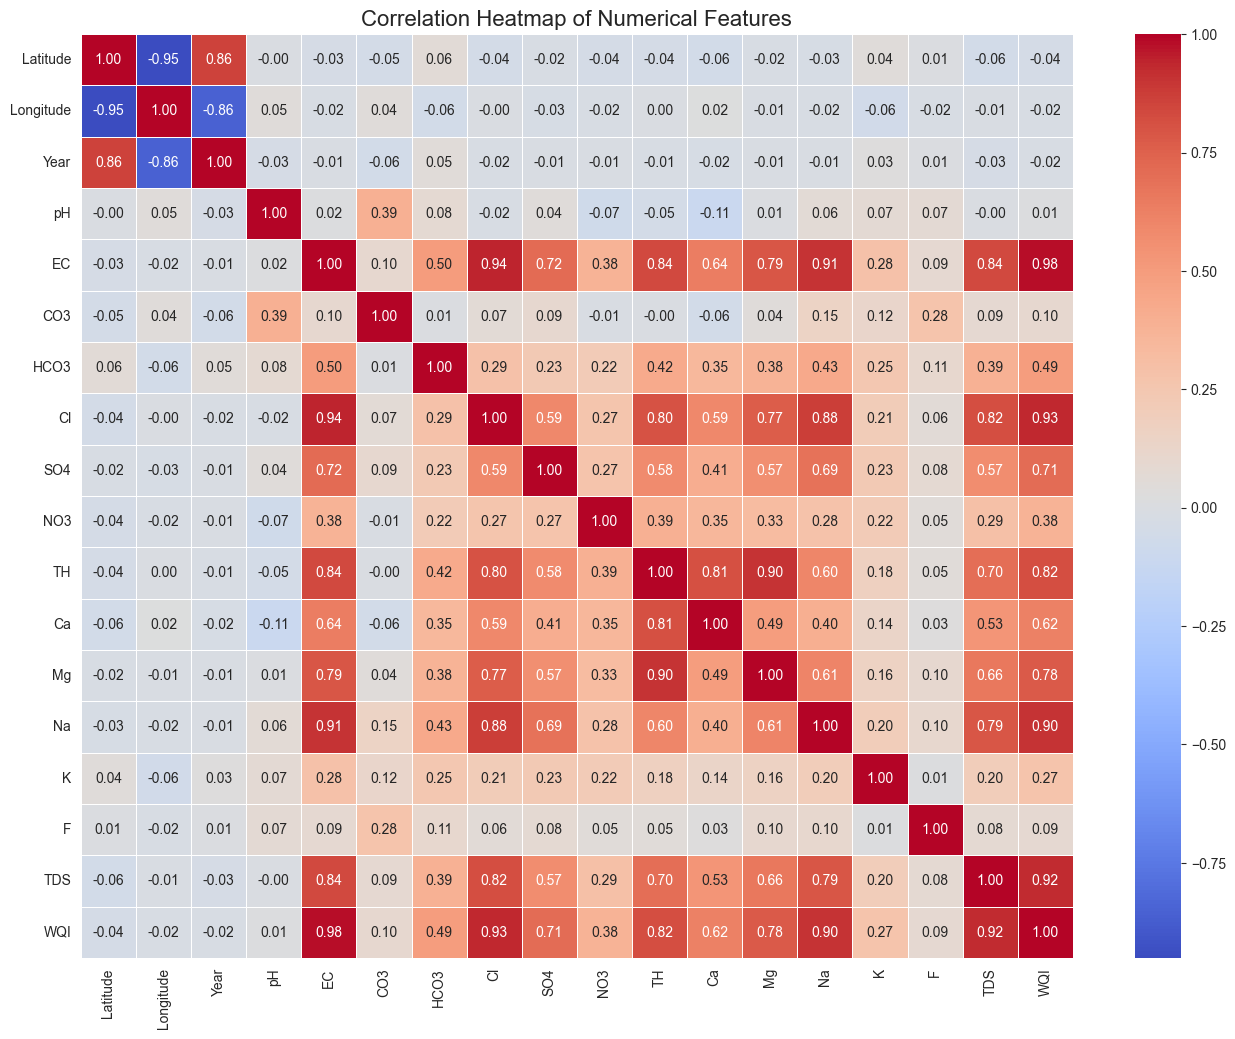

In [6]:
# ==============================================================================
# 6. CORRELATION ANALYSIS
# ==============================================================================
if 'WQI' in df.columns:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Get correlation with WQI and sort it
    wqi_corr = correlation_matrix['WQI'].sort_values(ascending=False)
    print("\n🔗 Correlation of Numerical Features with WQI:")
    print(wqi_corr)

    # Visualize the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=.5)
    plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
    plt.savefig(reports_dir / 'correlation_heatmap.png', bbox_inches='tight')
    print(f"\n✅ Correlation heatmap saved to '{reports_dir / 'correlation_heatmap.png'}'")
    plt.show()
else:
    print("⚠️ 'WQI' column not found, skipping correlation analysis.")


 ## 7. Distribution & Outlier Analysis
 We visualize the distributions of numerical features to check for skewness and identify outliers, which can heavily influence model performance.



📊 Visualizing distributions for the top 8 features correlated with WQI...


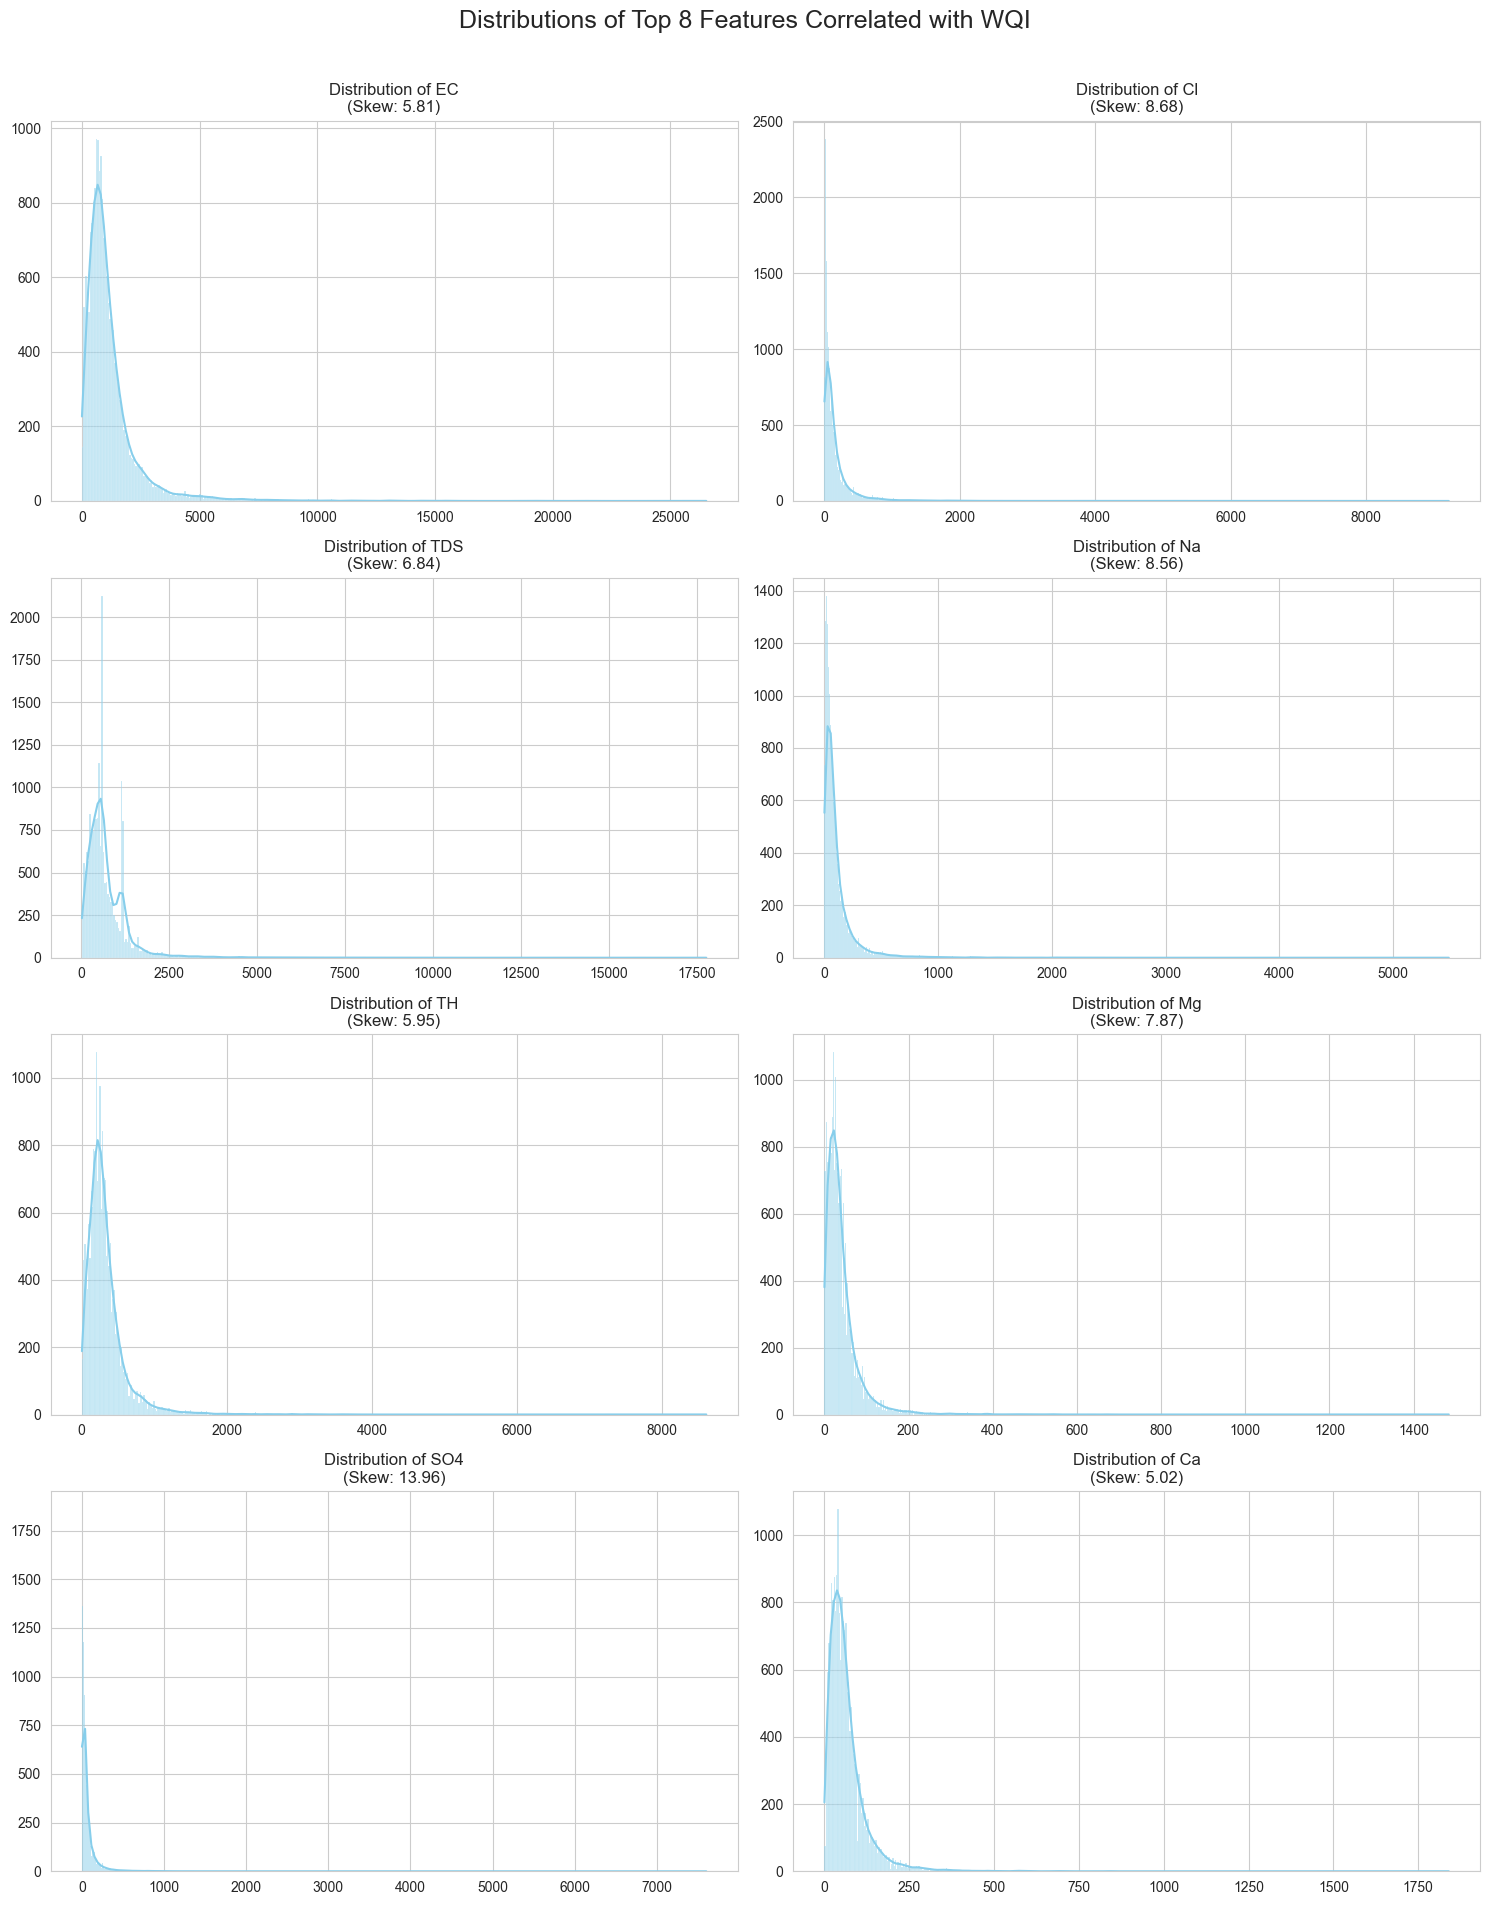


❗ Outlier Detection Summary for Key Features (based on 1.5 * IQR rule):


,count,percentage
Cl,1786,9.47%
SO4,1786,9.47%
Na,1687,8.94%
EC,1356,7.19%
Mg,1188,6.30%
TH,1172,6.21%
Ca,1102,5.84%
TDS,823,4.36%


In [7]:
# ==============================================================================
# 7. DISTRIBUTION & OUTLIER ANALYSIS (OPTIMIZED)
# ==============================================================================
if not df.empty and 'WQI' in df.columns:
    print("\n📊 Visualizing distributions for the top 8 features correlated with WQI...")
    
    # --- 7.1 Visualize Key Feature Distributions on a Grid ---
    # Select only the top 8 most correlated features with WQI to keep the plot readable
    wqi_corr = df[numerical_cols].corr(numeric_only=True)['WQI'].abs().sort_values(ascending=False)
    # Top 8 features, excluding WQI itself
    top_features = wqi_corr[1:9].index.tolist()

    # Create a grid of subplots
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    # Flatten the 2D array of axes for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(top_features):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        skewness = df[col].skew()
        axes[i].set_title(f'Distribution of {col}\n(Skew: {skewness:.2f})', fontsize=12)
        axes[i].set_xlabel('')  # Clean up x-labels for a tidier look
        axes[i].set_ylabel('')

    plt.suptitle('Distributions of Top 8 Features Correlated with WQI', fontsize=18)
    # Adjust layout to prevent titles from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(reports_dir / 'top_features_distribution.png', bbox_inches='tight')
    plt.show()

    # --- 7.2 Outlier Detection Summary for Key Features ---
    print("\n❗ Outlier Detection Summary for Key Features (based on 1.5 * IQR rule):")
    outlier_summary = {}

    for col in top_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        if not outliers.empty:
            outlier_summary[col] = {
                'count': len(outliers),
                'percentage': f"{outlier_percentage:.2f}%"
            }
            
    if outlier_summary:
        outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index')
        display(outlier_df.sort_values(by='count', ascending=False))
    else:
        print("✅ No outliers detected in the key features based on the IQR method.")

In [8]:
# ==============================================================================
# 9. SAVE THE CLEANED DATA
# ==============================================================================
# Create the processed data directory if it doesn't exist
processed_dir = base_dir / 'data' / 'processed'
processed_dir.mkdir(parents=True, exist_ok=True)

# Define the path for the cleaned data
cleaned_data_path = processed_dir / 'water_quality_cleaned.csv'

# Save the final, cleaned dataframe to a new CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"✅ Cleaned dataset with {df.shape[0]} rows saved to '{cleaned_data_path}'")

✅ Cleaned dataset with 18860 rows saved to 'c:\Users\Fernado\Desktop\ML_Project\data\processed\water_quality_cleaned.csv'


## 8. Summary of Findings & Next Steps

This initial phase of the project successfully performed a thorough exploratory data analysis and essential data cleaning. The key takeaways that will inform the next stage of modeling are:

1.  **Comprehensive Data Cleaning**: The raw dataset of **19,029 rows** underwent a rigorous cleaning process. This included:
    * Imputing missing numerical values using the median.
    * Removing 7 duplicate records.
    * A critical data validation step that removed **161 rows** with impossible geographic coordinates and **1 row** with a negative chemical concentration.
    * This resulted in a final, reliable dataset of **18,860 rows** for modeling.

2.  **Clear Feature Importance**: Correlation analysis confirmed that a few features are highly predictive of the `Water Quality Index (WQI)`. **`Electrical Conductivity (EC)`**, **`Chloride (Cl)`**, **`Total Dissolved Solids (TDS)`**, and **`Sodium (Na)`** are the strongest candidates for the model, all exhibiting very high correlation coefficients.

3.  **Identified Class Imbalance**: The target variable, `Water Quality Classification`, is imbalanced. The "Unsuitable for Drinking" and "Poor" categories are far more prevalent than the "Good" and "Excellent" categories. This necessitates using techniques like stratified splitting during model training to ensure the model learns from all classes.

4.  **Severe Feature Skewness**: The most critical finding for preprocessing is that **all top predictor variables are severely right-skewed**. The distribution plots clearly show data concentrated at lower values with a long tail of extreme high values, which are also flagged as outliers.

### **Actionable Next Steps**

The path to model training is clear. The cleaned dataset must be preprocessed to address the issues identified:

* **Apply a Logarithmic Transformation**: A log transform (specifically `np.log1p` to handle zeros) must be applied to the skewed numerical features to help normalize their distributions and reduce the impact of outliers.
* **Scale Features**: After transformation, all features must be scaled (e.g., using `MinMaxScaler`) to a uniform range.

The project will now proceed to `02_model_training_and_evaluation.ipynb` with this cleaned dataset and a clear preprocessing strategy.